# _Diffusion models for Gaussian distributions: Exact solutions and Wasserstein errors_ [ [ 1 ] ](#ref1)

The following code provides figures and table of the article [ [ 1 ] ](#ref1). You can use it with your own scheme and data.

### Reminders of the theory

We consider the Variance preserving (VP) forward process:

$$
d\boldsymbol{x}_t  =-\beta_t \boldsymbol{x}_t dt + \sqrt{2\beta_t}d\boldsymbol{w}_t, \quad 0 \leq t \leq T, \quad  \boldsymbol{x}_0 \sim p_\text{data} \qquad \qquad \quad(1)
$$

Supposing that $p_\text{data} = \mathcal{N}(\boldsymbol{0},\boldsymbol{I})$, the law of $\boldsymbol{x}_t$ is $p_t = \mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_t)$ with
$$
\boldsymbol{\Sigma}_t = e^{-2B_t}\boldsymbol{\Sigma} + (1-e^{-2B_t})\boldsymbol{I}\quad \qquad\qquad \qquad\qquad \qquad \qquad \qquad (2)
$$

where $B_t = \int_0^t \beta_u$ and consequently the score function verifies $\nabla \log p_t(\boldsymbol{x}) = -\boldsymbol{\Sigma}^{-1}_t\boldsymbol{x}$.

Furthermore, the backward process can be studied considering the backward SDE

$$
 d\tilde{\boldsymbol{y}}_t = \beta_{T-t}(\tilde{\boldsymbol{y}}_t + 2\nabla \log p_{T-t}(\tilde{\boldsymbol{y}}_t))dt + \sqrt{2\beta_{T-t}}d\boldsymbol{w}_t, \quad0 \leq t < T \qquad (3)
$$

or the reverse flow ODE:

$$
 	d\widehat{\boldsymbol{y}}_t = \left[\beta_{T-t}\widehat{\boldsymbol{y}}_t +\beta_{T-t} \nabla_{\widehat{\boldsymbol{y}}}\log p_{T-t}(\widehat{\boldsymbol{y}}_t)\right]dt, \quad 0 \leq t < T. \qquad\qquad\quad (4)
$$

We study the errors of the diffusion models by studying the Wasserstein-2 distance. For two centered Gaussians $\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_1)$ and $\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_2)$ such that $\boldsymbol{\Sigma}_1,\boldsymbol{\Sigma}_2$ are simultaneously diagonalizable with respective eigenvalues $\left(\lambda_{i,1}\right)_{1\leq i \leq d},\left(\lambda_{i,2}\right)_{1\leq i \leq d}$,

$$
	\mathbf{W}_2(\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_2),\mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_1)) =  \sqrt{\sum_{1 \leq i \leq d} (\sqrt{\lambda_{i,1}}-\sqrt{\lambda_{i,2}})^2}. \qquad \qquad \qquad   (5)
$$

In [1]:
def W2(lamb1,lamb2) :
    return np.sqrt ( np.sum( (np.sqrt(lamb1)-np.sqrt(lamb2))**2 ) )

## Packages

In [2]:
!pip install scienceplots

In [3]:
import pylab as plt
import numpy as np
import scienceplots
plt.style.use('science')
from IPython.display import display, Markdown
import os
plt.rcParams.update(plt.rcParamsDefault)

# Load data (you can use your own data)

The Gaussian distribution is known through the eigenvalues of its covariance matrix $\boldsymbol{\Sigma}$. ```cifar10.npy``` corresponds to the Gaussian distribution fitted to the CIFAR-10 dataset. This the list of empirical covariance eigenvalues of the normalized images of the dataset. ```ADSN.npy``` corresponds to the ADSN distribution described in the paper.

In [4]:
PATH_data ='/Users/pierret/Documents/Rebuttal_neurips/' #'./'

lamb = np.load(PATH_data+'cifar10.npy')

In [5]:
lamb*=(lamb>0.)

Bellow, you can choose the outputs path.

In [6]:
PATH_output = './'

## Parametrization

Let consider $\beta_t$ linear of the form: $\beta_t = t \mapsto \beta_{\text{min}} + \left(\beta_{\text{max}}-\beta_{\text{min}}\right)t$ with $\beta_\text{min} = 0.05$ and $\beta_\text{max} = 10$. The values are from [ [ 2 ] ](#ref2), up to a factor 2 to be consistent with our VP SDE. We introduce also

$$B_t = \int_0^t \beta_u du = \beta_{\text{min}}t + \left(\beta_{\text{max}}-\beta_{\text{min}}\right)\frac{t^2}{2}.$$

In [7]:
T = 1.
beta_min = 0.1/2
beta_max = 20/2

def beta(t) :
    return beta_min + t*(beta_max-beta_min)

def B(t) :
    return beta_min*t +(beta_max-beta_min)*t**2/2

# Forward process

$p_t = \mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma}_t)$ with $\boldsymbol{\Sigma}_t = e^{-2B_t}\boldsymbol{\Sigma} + (1-e^{-2B_t})\boldsymbol{I}$. Let consider the eigenvalues of $\left(\lambda_i\right)_{1 \leq i \leq d}$ of $\boldsymbol{\Sigma}$.  $\boldsymbol{\Sigma}_t$ is diagonalizable in the same orthonormal basis and the $i$th eigenvalue of $\Sigma_t$ is:

$$
\lambda_i^t = e^{-2B_t}\lambda_i + (1-e^{-2B_t}). \qquad \qquad \qquad \qquad \qquad \qquad \qquad (6)
$$

In [8]:
def lamb_Sigma_t(lamb,t) :
    ebt = np.exp(-2*B(t))
    return ebt*lamb+(1-ebt)

# Continuous Initialization error

### Continuous SDE

With an initialization $\tilde{\boldsymbol{y}}_0 \sim \mathcal{N}(\boldsymbol{0},\boldsymbol{I})$, the solution $y_t$ of Equation (3) follows the law $\tilde{q}_{t} = \tilde{p}_{T-t}$ where $\tilde{p}_t$ is the Gaussian distribution $\mathcal{N}(\boldsymbol{0},\boldsymbol{\tilde{\Sigma}}_t)$ and

$$
\boldsymbol{\tilde{\Sigma}}_t = \boldsymbol{\Sigma}_{t}+e^{-2(B_{T}-B_t)}\boldsymbol{\Sigma}^2_{t}\boldsymbol{\Sigma}_T^{-1}(\boldsymbol{\Sigma}^{-1}_T-\boldsymbol{I}) \qquad \qquad \qquad \qquad \qquad (7)
$$

Consequently, $\boldsymbol{\tilde{\Sigma}}_t$ is diagonalizable and we can compute its eigenvalues as follows.

In [9]:
def lamb_SDE_t(lamb,t) :

    lamb_t = lamb_Sigma_t(lamb,t)
    lamb_T = lamb_Sigma_t(lamb,T)

    return lamb_t+np.exp(-2*(B(T)-B(t)))*lamb_t**2/lamb_T*(1/lamb_T-1)

### Continuous ODE

With an initialization $\widehat{\boldsymbol{y}}_0 \sim \mathcal{N}(\boldsymbol{0},\boldsymbol{I})$, the solution $\widehat{y}_t$ of Equation (4) follows the law $\widehat{q}_{t} = \widehat{p}_{T-t}$ where $\widehat{p}_t$ is the Gaussian distribution $\mathcal{N}(\boldsymbol{0},\boldsymbol{\widehat{\Sigma}}_t)$ and

$$
\boldsymbol{\widehat{\Sigma}}_t = \boldsymbol{\Sigma}^{-1}_T\boldsymbol{\Sigma}_{t} \qquad\qquad\qquad \qquad\qquad\qquad\qquad\qquad   \qquad (8)
$$

Consequently, $\boldsymbol{\tilde{\Sigma}}_t$ is diagonalizable and we can compute its eigenvalues as follows.

In [10]:
def lamb_ODE_t(lamb,t) :

    lamb_t = lamb_Sigma_t(lamb,t)
    lamb_T = lamb_Sigma_t(lamb,T)


    return lamb_t/lamb_T

# Discretization of the equations

## Discretization of the bacward SDE

Under Gaussian assumption, Equation (3) becomes:

$$
 d\tilde{\boldsymbol{y}}_t = \beta_{T-t}(\tilde{\boldsymbol{y}}_t - 2\boldsymbol{\Sigma}^{-1}_{T-t}(\tilde{\boldsymbol{y}}_t))dt + \sqrt{2\beta_{T-t}}d\boldsymbol{w}_t, \quad0 \leq t < T. \qquad\qquad\qquad\qquad(9)
$$

We study the Euler-Maruyama's scheme (EM) and the Exponential Integrator scheme (EI).

### Euler Maruyama's scheme

The EM discretization of Equation (9) is:
$$
\boldsymbol{y}^{\text{EM},k+1} = \boldsymbol{y}^{\text{EM},k} + \Delta_t \beta_{T-t_k}\left(\boldsymbol{y}_{k}-2\Sigma_{T-t_k}^{-1}\boldsymbol{y}^{\text{EM},k}\right)+ \sqrt{2\Delta_t \beta_{T-t_k}}\boldsymbol{z}_k, \quad \boldsymbol{z}_k \sim \mathcal{N}_0 \qquad(10)
$$

Consequently, the $i$th eigenvalue $\lambda_i^{EM,k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{EM}}\right)_{0 \leq k \leq N-1}$ verifies:

$$
\lambda_i^{\text{EM},k+1} = \left(1+\Delta_t \beta_{T-t_k}\left(1-\tfrac{2}{\lambda_i^{T-t_k}}\right)\right)^2\lambda_i^{\text{EM},k} + 2\Delta_t \beta_{T-t_k} \qquad\qquad\qquad\qquad (11)
$$

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{EM},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.

In [11]:
def W2_EM(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_EM = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_EM = np.ones_like(lamb)

    if all_t :
        W2_EM_list = [W2(lamb_EM,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk = lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_EM =  (1+Delta_t*beta_T_tk*(1-2/lamb_T_tk))**2*lamb_EM + 2*Delta_t*beta_T_tk

        if all_t :
            W2_EM_list.append(W2(lamb_EM,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_EM_list.reverse()
        return W2_EM_list

    else :
        return W2(lamb_EM,lamb)

### Exponential Integrator (EI) scheme

The EI discretization of Equation (9) is:
$$
\boldsymbol{y}^{\text{EI},k+1} = \boldsymbol{y}^{\text{EI},k} + \gamma_{1,k}\left(\boldsymbol{y}^{\text{EI},k+1}-2\Sigma_{T-t_k}^{-1}\boldsymbol{y}^{\text{EI},k}\right)+ \sqrt{2\gamma_{2,k}}\boldsymbol{z}_k \quad \boldsymbol{z}_k\sim \mathcal{N}_0 \qquad\qquad\qquad (12)
$$

with
$\gamma_{1,k}  = \exp\left(B_{T-t_{k}}-B_{T-t_{k+1}}\right)-1$ and $\gamma_{2,k}  = \frac{1}{2}\left[\exp\left(2\left(B_{T-t_{k}}-B_{T-t_{k+1}}\right)\right)-1\right]$.

Consequently, the $i$th eigenvalue $\lambda_i^{\text{EI},k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{EI}}\right)_{0 \leq k \leq N-1}$ verifies:

$$
\lambda_i^{\text{EI},k+1} = \left(1+\gamma_{1,k}\left(1-\tfrac{2}{\lambda_i^{T-t_k}}\right)\right)^2\lambda_i^{\text{EI},k}+ 2\gamma_{2,k} \qquad\qquad\qquad\qquad\qquad\qquad \qquad (13)
$$

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{EI},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.


In [12]:
def W2_EI(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_EI = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_EI = np.ones_like(lamb)

    if all_t :
        W2_EI_list = [W2(lamb_EI,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        gamma_1_k = np.exp(B(T-tk[k])-B(T-tk[k+1]))-1
        gamma_2_k = (np.exp(2*(B(T-tk[k])-B(T-tk[k+1])))-1)/2

        lamb_T_tk =  lamb_Sigma_t(lamb,T-tk[k])

        beta_T_tk = beta(T-tk[k])


        lamb_EI = (1+gamma_1_k*(1-2/lamb_T_tk))**2*lamb_EI + 2*gamma_2_k

        if all_t :

            W2_EI_list.append(W2(lamb_EI,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_EI_list.reverse()

        return W2_EI_list

    else :

        return W2(lamb_EI,lamb)

## Discretization of the flow ODE

Under Gaussian assumption, Equation (4) becomes:

$$
 	d\widehat{\boldsymbol{y}}_t = \left[\beta_{T-t}\widehat{\boldsymbol{y}}_t -\beta_{T-t} \boldsymbol{\Sigma}^{-1}_{T-t}(\widehat{\boldsymbol{y}}_t)\right]dt, \quad 0 \leq t < T. \qquad\qquad\qquad\qquad\qquad (14)
$$

We study the Euler scheme and the Heun's scheme.

## Euler scheme

The EM discretization of Equation (14) is:

$$
\boldsymbol{y}^{\text{Euler},k+1} = \boldsymbol{y}^{\text{Euler},k}+\Delta_t\beta_{T-t_k}\left(\boldsymbol{y}^{\text{Euler},k}-\Sigma^{-1}_{T-t_k}\boldsymbol{y}^{\text{Euler},k}\right) \qquad\qquad\qquad\qquad (15)
$$

Consequently, the $i$th eigenvalue $\lambda_i^{Euler,k}$ of the covariance matrix of $\left(\boldsymbol{y}^{k,\text{Euler}}\right)_{0 \leq k \leq N-1}$ verifies:

$$
\lambda_i^{\text{Euler},k+1} =\left(1+\Delta_t\beta_{T-t_k}\left(1-\tfrac{1}{\lambda_i^{T-t_k}}\right)\right)^2\lambda_i^{\text{Euler},k} \qquad\qquad\qquad\qquad\qquad (16)
$$

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$ and $\lambda_i^{\text{Euler},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization. The following compute the Wasserstein error at each step.

In [13]:
def W2_Euler(N,lamb,t_eps=0,p_T = False,all_t = True) :

    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_Euler = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_Euler = np.ones_like(lamb)

    if all_t :
        W2_Euler_list = [W2(lamb_Euler,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk =  lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_Euler = (1+Delta_t*beta_T_tk*(1-1/lamb_T_tk))**2*lamb_Euler

        if all_t :
            W2_Euler_list.append(W2(lamb_Euler,lamb_Sigma_t(lamb,T-tk[k+1])))

    if all_t :
        W2_Euler_list.reverse()

        return W2_Euler_list

    else :

        return W2(lamb_Euler,lamb)

## Heun's scheme

The EM discretization of Equation (14) is:
$$
\begin{aligned}
        y^{k+1/2,\text{Heun}} & = y^{k,\text{Heun}}+ \Delta_t \beta_{T-t_k}\left(y^{k,\text{Heun}}-\boldsymbol{\Sigma}_{T-t_k}^{-1}y^{k,\text{Heun}}\right) \quad \quad \\
        y^{k+1,\text{Heun}} & = y^{k,\text{Heun}}+ \frac{\Delta_t}{2} \beta_{T-t_k}\left(y^{k,\text{Heun}}-\boldsymbol{\Sigma}_{T-t_k}^{-1}y^{k,\text{Heun}}\right)+ \frac{\Delta_t}{2} \beta_{T-t_{k+1}}\left(y^{k+1/2,\text{Heun}}-\boldsymbol{\Sigma}_{T-t_{k+1}}^{-1}y^{k+1/2,\text{Heun}}\right)
\end{aligned}
$$

Consequently, the $i$th eigenvalue $\lambda_i^{\text{Heun},k}$ of the covariance matrix of $\left(y^{k,\text{Heun}}\right)_{0 \leq k \leq N-1}$ verifies:

$$
 \lambda_i^{k+1,\text{Heun}}  = \left(1+ \frac{\Delta_t}{2} \beta_{T-t_k}\left(1-\tfrac{1}{\lambda_i^{T-t_k}}\right)+\frac{\Delta_t}{2} \beta_{T-t_{k+1}}\left(1-\tfrac{1}{\lambda_i^{T-t_{k+1}}}\right)\left( 1+ \Delta_t \beta_{T-t_k}\left(1-\tfrac{1}{\lambda_i^{T-t_k}}\right)\right)\right)^2\lambda_i^{k,\text{Heun}} \qquad \qquad \qquad (17)
$$

with $\lambda_i^{t}$ $i$th eigenvalue of $\boldsymbol{\Sigma}_t$. With $\lambda_i^{\text{Heun},0}$ initialized at $1$ or $\lambda_i^{T}$ depending on the choice of initialization.

In [14]:
def W2_Heun(N,lamb,t_eps=0,p_T = False,all_t = True) :
    tk = np.array([(T-t_eps)*k/(N-1) for k in range(N)])
    Delta_t = tk[1]-tk[0]

    #Initialization at p_T
    if p_T :
        lamb_Heun = lamb_Sigma_t(lamb,T)
    #Initialization at N_0
    else :
        lamb_Heun = np.ones_like(lamb)

    if all_t :
        W2_Heun_list = [W2(lamb_Heun,lamb_Sigma_t(lamb,T))]

    for k in range(N-1) :
        lamb_T_tk =  lamb_Sigma_t(lamb,T-tk[k])
        beta_T_tk = beta(T-tk[k])

        lamb_T_tk_1 =  lamb_Sigma_t(lamb,T-tk[k+1])
        beta_T_tk_1 = beta(T-tk[k+1])


        lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun

        if all_t :
            W2_Heun_list.append(W2(lamb_Heun,lamb_T_tk_1 ))

    if all_t :
        W2_Heun_list.reverse()

        return W2_Heun_list

    else :

        return W2(lamb_Heun,lamb)

# Error graphs

Bellow, the code to plot the Figure 1 of [ [ 1 ] ](#ref1) showing the Wasserstein value of the discretization, the initialization along the time and the truncation error.

### Discretization and initialization

/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_55654/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun


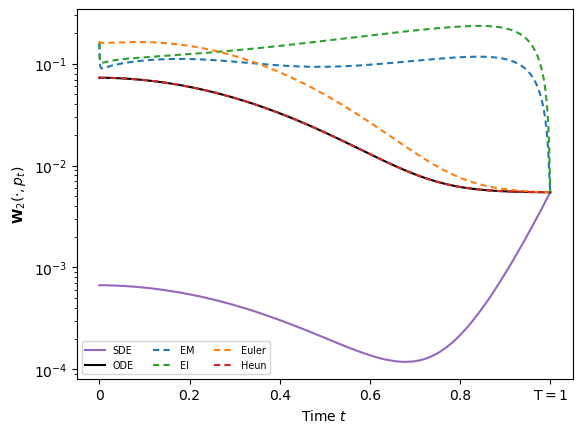

<Figure size 640x480 with 0 Axes>

In [15]:
T = 1
N = 1000
tk = np.array([T*k/(N-1) for k in range(N)])


W2_SDE = [W2(lamb_SDE_t(lamb,T-t),lamb_Sigma_t(lamb,T-t)) for t in tk]
W2_SDE.reverse()
W2_ODE = [W2(lamb_ODE_t(lamb,T-t),lamb_Sigma_t(lamb,T-t)) for t in tk]
W2_ODE.reverse()

plt.semilogy(tk,W2_SDE,'-',label='SDE',color='tab:purple')
plt.semilogy(tk,W2_ODE,'-',label='ODE',color='k')

das = (3,2)
plt.semilogy(tk,W2_EM(N,lamb),'--',label='EM',dashes=das,color='C0')
plt.semilogy(tk,W2_EI(N,lamb),'--',label='EI',dashes=das,color='tab:green')
plt.semilogy(tk,W2_Euler(N,lamb),'--',label='Euler',dashes=das,color='tab:orange')
plt.semilogy(tk,W2_Heun(N,lamb),'--',label='Heun',dashes=das,color='tab:red')



plt.ylabel('$\mathbf{W}_2(\cdot,p_t)$')
axes = plt.gca()
axes.xaxis.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
axes.xaxis.set_ticklabels(["0","0.2","0.4","0.6","0.8",r"$\mathrm{T} = 1$"])

plt.xlabel('Time $t$')


plt.legend( ncol=3,fontsize='x-small')

plt.show()

plt.savefig(PATH_output+'discretization_initialization_error.pdf', bbox_inches='tight', dpi=100)

### Truncation

In [16]:
eps_list_graph = [0,10**-5,10**-4,10**-3,10**-2]

W2_eps_EM = []
W2_eps_EI = []
W2_eps_Euler = []
W2_eps_Heun = []
W2_eps_SDE = []
W2_eps_ODE = []

N = 1000

eps_list_graph = [0,10**-5,10**-4,10**-3,10**-2]
for t_eps in eps_list_graph :
    W2_eps_EM.append(W2_EM(N,lamb,t_eps,all_t=False))
    W2_eps_EI.append(W2_EI(N,lamb,t_eps,all_t=False))
    W2_eps_Euler.append(W2_Euler(N,lamb,t_eps,all_t=False))
    W2_eps_Heun.append(W2_Heun(N,lamb,t_eps,all_t=False))
    W2_eps_SDE.append(W2(lamb_SDE_t(lamb,t_eps),lamb_Sigma_t(lamb,0)))
    W2_eps_ODE.append(W2(lamb_ODE_t(lamb,t_eps),lamb_Sigma_t(lamb,0)))

/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_55654/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun


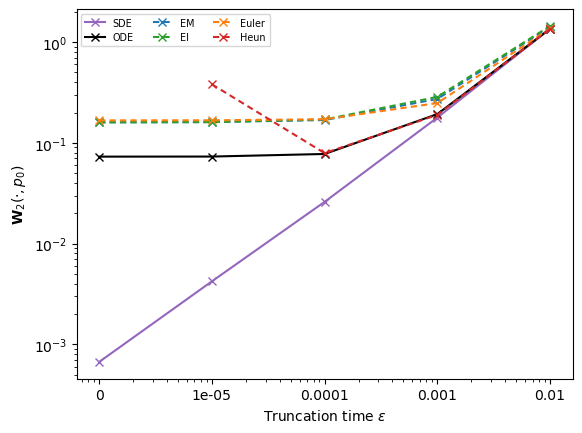

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure()

T_eps_plot = [10**-6,10**-5,10**-4,10**-3,10**-2]
#The 'zero eps' is plotted at 10**-6 to enable the loglog setting

plt.loglog(T_eps_plot,W2_eps_SDE,'-x',label='SDE',color='tab:purple')
plt.loglog(T_eps_plot,W2_eps_ODE,'-x',label='ODE',color='k')
das = (3,2)
plt.loglog(T_eps_plot,W2_eps_EM,'--x',label='EM',dashes=das,color='C0')
plt.loglog(T_eps_plot,W2_eps_EI,'--x',label='EI',dashes=das,color='tab:green')
plt.loglog(T_eps_plot,W2_eps_Euler,'--x',label='Euler',dashes=das,color='tab:orange')
plt.loglog(T_eps_plot,W2_eps_Heun,'--x',label='Heun',dashes=das,color='tab:red')

#plt.legend()
axes = plt.gca()
axes.xaxis.set_ticks(T_eps_plot)
axes.xaxis.set_ticklabels([str(t_eps) for t_eps in eps_list_graph])
plt.ylabel('$\mathbf{W}_2(\cdot,p_0)$')

plt.xlabel(r'Truncation time $\varepsilon$')


plt.legend(ncol=3,fontsize='x-small')

plt.show()

plt.savefig(PATH_output+'truncation_error.pdf', bbox_inches='tight', dpi=100)

## Two graphs with the same scale

/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_55654/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun


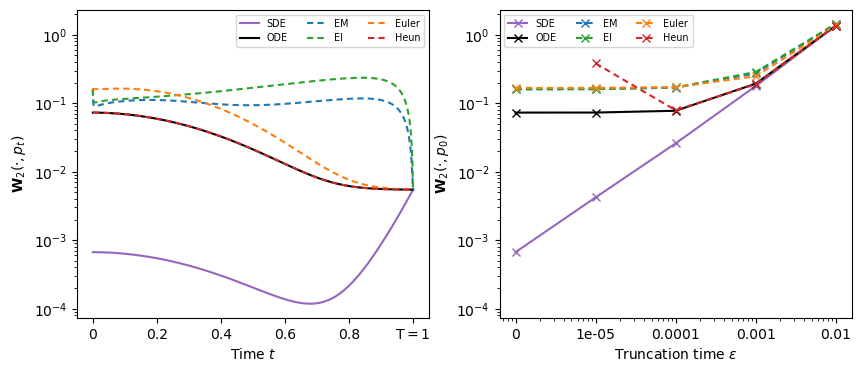

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.semilogy(tk,W2_SDE,'-',label='SDE',color='tab:purple')
plt.semilogy(tk,W2_ODE,'-',label='ODE',color='k')

das = (3,2)
plt.semilogy(tk,W2_EM(N,lamb),'--',label='EM',dashes=das,color='C0')
plt.semilogy(tk,W2_EI(N,lamb),'--',label='EI',dashes=das,color='tab:green')
plt.semilogy(tk,W2_Euler(N,lamb),'--',label='Euler',dashes=das,color='tab:orange')
plt.semilogy(tk,W2_Heun(N,lamb),'--',label='Heun',dashes=das,color='tab:red')


plt.ylabel('$\mathbf{W}_2(\cdot,p_t)$')
axes = plt.gca()
axes.xaxis.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
axes.xaxis.set_ticklabels(["0","0.2","0.4","0.6","0.8",r"$\mathrm{T} = 1$"])

plt.xlabel('Time $t$')


plt.legend( ncol=3,fontsize='x-small')

plt.subplot(1,2,2,sharey=axes)

T_eps_plot = [10**-6,10**-5,10**-4,10**-3,10**-2]


plt.loglog(T_eps_plot,W2_eps_SDE,'-x',label='SDE',color='tab:purple')
plt.loglog(T_eps_plot,W2_eps_ODE,'-x',label='ODE',color='k')
das = (3,2)
plt.loglog(T_eps_plot,W2_eps_EM,'--x',label='EM',dashes=das,color='C0')
plt.loglog(T_eps_plot,W2_eps_EI,'--x',label='EI',dashes=das,color='tab:green')
plt.loglog(T_eps_plot,W2_eps_Euler,'--x',label='Euler',dashes=das,color='tab:orange')
plt.loglog(T_eps_plot,W2_eps_Heun,'--x',label='Heun',dashes=das,color='tab:red')

axes = plt.gca()
axes.xaxis.set_ticks(T_eps_plot)
axes.xaxis.set_ticklabels([str(t_eps) for t_eps in eps_list_graph])
plt.ylabel('$\mathbf{W}_2(\cdot,p_0)$')

plt.xlabel(r'Truncation time $\varepsilon$')

plt.legend(ncol=3,fontsize='x-small')

plt.show()

plt.savefig(PATH_output+'truncation_discretization_initialization.pdf', bbox_inches='tight', dpi=100)

# Ablation study table

The following code displays the table corresponding to Table 2 of [ [ 1 ] ](#ref1).

In [19]:
N_list = [50,250,500,1000] #500
eps_list = [0., 10**-5,10**-3,10**-2]
P_T = [True,False]
schemes_list = ['EM','EI','Euler','Heun']


W2_dict = {scheme: {str(p_T):{} for p_T in P_T } for scheme in schemes_list}
W2_dict['SDE'] =  {str(p_T):{} for p_T in P_T }
W2_dict['ODE'] = {str(p_T):{} for p_T in P_T }
#Continuous integration


for scheme in ['SDE','ODE'] :
    if scheme == 'SDE' :
        lamb_funct = lamb_SDE_t
    elif scheme == 'ODE' :
        lamb_funct = lamb_ODE_t
    for t_eps in eps_list :
        W2_dict[scheme]['False'][str(t_eps)] = W2(lamb_funct(lamb,t_eps),lamb_Sigma_t(lamb,0))
        W2_dict[scheme]['True'][str(t_eps)] = W2(lamb_Sigma_t(lamb,t_eps),lamb_Sigma_t(lamb,0))


for scheme in schemes_list :

    if scheme == 'EM' :
            W2_funct = W2_EM
    elif scheme == 'EI' :
            W2_funct = W2_EI
    elif scheme == 'Euler' :
            W2_funct = W2_Euler
    elif scheme == 'Heun' :
            W2_funct = W2_Heun
    for p_T in P_T :
        for N in N_list :
            W2_dict[scheme][str(p_T)][str(N)] = {}
            for t_eps in eps_list :
                W2_dict[scheme][str(p_T)][str(N)][str(t_eps)] = W2_funct(N,lamb,t_eps=t_eps,p_T = p_T ,all_t=False)

/var/folders/59/32mlzt9101s96_s3bpqbffvr0000gp/T/ipykernel_55654/1759821661.py:23: RuntimeWarning: divide by zero encountered in divide
  lamb_Heun =(1+ Delta_t/2*beta_T_tk*(1-1/lamb_T_tk)+Delta_t/2*beta_T_tk_1*(1-1/lamb_T_tk_1)*(1+Delta_t*beta_T_tk*(1-1/lamb_T_tk)))**2*lamb_Heun


### Markdown table

In the following, the table is displayed in the notebook via Markdown.

In [20]:
def formatting_number(x) :
    if x == 0 :
        str_x = '0'
    elif x == np.inf :
        str_x = '-'
    elif np.log10(x).is_integer() :
        str_x = '10^{'+str(int(np.log10(x)))+'}'
    elif  x > 10**2 :
        str_x = '{:1.1E}'.format(x)
    elif x < 10**-2 :
        str_x =  '{:1.1E}'.format(x)
    else :
        str_x =  '{:1.2f}'.format(x)
    return str_x

In [21]:
table_Markdown = '|||'
table_Markdown += ' Continuous||'

for N in N_list :
    table_Markdown += '  N =  ' +str(N)+'||'

table_Markdown += '\n'

table_Markdown += '|:---:|:---:|:---:|:---:|'
for N in N_list :
    table_Markdown += ':---:|:---:|'

table_Markdown += '\n'

table_Markdown += '|||$p_T$|$\mathcal{N}_0$|'
for N in N_list :
    table_Markdown += '$p_T$|$\mathcal{N}_0$|'

table_Markdown += '\n'


for scheme in schemes_list :
    table_Markdown += '|'+scheme+'|'
    for t_eps in eps_list :
        if t_eps != eps_list[0] :
          table_Markdown += '||'
        table_Markdown += r'$\varepsilon = '+formatting_number(t_eps)+'$|'
        if scheme in ['EM','EI'] :
            table_Markdown += formatting_number(W2_dict['SDE']['True'][str(t_eps)])+'|'
            table_Markdown += formatting_number(W2_dict['SDE']['False'][str(t_eps)])+'|'
        if scheme in ['Euler','Heun'] :
            table_Markdown += formatting_number(W2_dict['ODE']['True'][str(t_eps)])+'|'
            table_Markdown += formatting_number(W2_dict['ODE']['False'][str(t_eps)])+'|'
        for N in N_list :
          table_Markdown += formatting_number(W2_dict[scheme]['True'][str(N)][str(t_eps)])+'|'
          table_Markdown += formatting_number(W2_dict[scheme]['False'][str(N)][str(t_eps)])+'|'
        table_Markdown += '\n'



Markdown(table_Markdown)

||| Continuous||  N =  50||  N =  250||  N =  500||  N =  1000||
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|||$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|$p_T$|$\mathcal{N}_0$|
|EM|$\varepsilon = 0$|0|6.7E-04|4.78|4.78|0.65|0.66|0.32|0.32|0.16|0.16|
||$\varepsilon = 10^{-5}$|4.2E-03|4.2E-03|4.77|4.77|0.66|0.66|0.32|0.32|0.16|0.16|
||$\varepsilon = 10^{-3}$|0.18|0.18|4.68|4.68|0.70|0.70|0.40|0.40|0.27|0.27|
||$\varepsilon = 10^{-2}$|1.35|1.35|4.56|4.56|1.69|1.69|1.50|1.51|1.43|1.43|
|EI|$\varepsilon = 0$|0|6.7E-04|2.81|2.81|0.57|0.57|0.30|0.30|0.16|0.16|
||$\varepsilon = 10^{-5}$|4.2E-03|4.2E-03|2.81|2.81|0.57|0.57|0.30|0.30|0.16|0.16|
||$\varepsilon = 10^{-3}$|0.18|0.18|2.91|2.91|0.67|0.67|0.41|0.41|0.29|0.29|
||$\varepsilon = 10^{-2}$|1.35|1.35|3.94|3.94|1.76|1.76|1.55|1.55|1.45|1.45|
|Euler|$\varepsilon = 0$|0|0.07|1.72|1.78|0.38|0.44|0.20|0.26|0.10|0.17|
||$\varepsilon = 10^{-5}$|4.2E-03|0.07|1.72|1.78|0.38|0.44|0.20|0.26|0.10|0.17|
||$\varepsilon = 10^{-3}$|0.18|0.19|1.73|1.79|0.42|0.48|0.27|0.32|0.21|0.25|
||$\varepsilon = 10^{-2}$|1.35|1.36|2.21|2.25|1.41|1.43|1.37|1.39|1.36|1.37|
|Heun|$\varepsilon = 0$|0|0.07|-|-|-|-|-|-|-|-|
||$\varepsilon = 10^{-5}$|4.2E-03|0.07|23.60|23.60|2.89|2.89|1.06|1.07|0.37|0.38|
||$\varepsilon = 10^{-3}$|0.18|0.19|0.58|0.59|0.13|0.15|0.16|0.18|0.17|0.19|
||$\varepsilon = 10^{-2}$|1.35|1.36|1.38|1.38|1.36|1.36|1.35|1.36|1.35|1.36|


### Tex table

In the following, a table.tex is created and compiled (if pdflatex is available) to obtain Table 2 of [ [ 1 ] ](#ref1).

In [22]:
output_tex = PATH_output + 'table.tex'

#preamble
table_tex  = r'\documentclass{article}' + '\n'
table_tex  += '\n'
table_tex  += r'\usepackage{booktabs}' + '\n'
table_tex  += r'\usepackage{multirow}' + '\n'
table_tex  += r'\usepackage{graphicx}' + '\n'
table_tex  +='\n'
table_tex  += r'\begin{document}' + '\n'
table_tex  +='\n'
#Table
table_tex  += r'\begin{table}' + '\n'
table_tex += r'\centering' + '\n'
table_tex += r'\begin{tabular}{'
table_tex += 'l'*(len(N_list)*len(P_T)+4) + '} \n'
table_tex += r'\toprule' + '\n'

table_tex += r'&'
table_tex += r' &\multicolumn{2}{c}{Continuous}' + '\n'

for N in N_list :
    table_tex += r'& \multicolumn{2}{c}{$N = '+str(N)+ r'$}' + '\n'

table_tex += r'\\' +'\n'

for k in range(2,len(N_list)*len(P_T)+4,2) :
    table_tex += r'\cmidrule(lr){'+str(k+1) +'-'+str(k+2)+ r'}' + '\n'

table_tex += r'& &$p_T$ & $\mathcal{N}_0$ & ' + '\n'
for N in N_list :
    if N == N_list[-1] :
        table_tex += r'$p_T$ & $\mathcal{N}_0$ \\' + '\n'
    else :
        table_tex += r'$p_T$ & $\mathcal{N}_0$ &' + '\n'

table_tex += r'\midrule' + '\n'

for scheme in schemes_list :
    table_tex += r'\parbox[t]{2mm}{\multirow{4}{*}{\rotatebox[origin=c]{90}{'+scheme+r'}}}' + '\n'
    #Continuous column
    for t_eps in eps_list :
        table_tex += r'& \multicolumn{1}{|l}{$\varepsilon = '+formatting_number(t_eps)+'$}\n'

        if scheme in ['EM','EI'] :
            table_tex += ' & '+formatting_number(W2_dict['SDE']['True'][str(t_eps)])+'\n'
            table_tex += ' & '+formatting_number(W2_dict['SDE']['False'][str(t_eps)])+'\n'
        if scheme in ['Euler','Heun'] :
            table_tex += ' & '+formatting_number(W2_dict['ODE']['True'][str(t_eps)])+'\n'
            table_tex += ' & '+formatting_number(W2_dict['ODE']['False'][str(t_eps)])+'\n'
        for N in N_list :
            table_tex += ' & '+formatting_number(W2_dict[scheme]['True'][str(N)][str(t_eps)])+'\n'
            table_tex += ' & '+formatting_number(W2_dict[scheme]['False'][str(N)][str(t_eps)])+'\n'
        table_tex +=  r'\\' + '\n'

table_tex += r'\bottomrule' + '\n'
table_tex += r'\end{tabular}' + '\n'
table_tex += r'\end{table}' + '\n'

table_tex += r'\end{document}'

if os.path.exists(output_tex) :
    os.remove(output_tex)

f = open(output_tex, "a")
f.write(table_tex)
f.close()

The following cell compiles the file .tex if latex is available.

In [23]:
from distutils.spawn import find_executable
if find_executable('latex'):
    os.system('pdflatex -v '+output_tex)

pdfTeX 3.141592653-2.6-1.40.24 (TeX Live 2022/MacPorts 2022.62882_1)
kpathsea version 6.3.4
Copyright 2022 Han The Thanh (pdfTeX) et al.
There is NO warranty.  Redistribution of this software is
covered by the terms of both the pdfTeX copyright and
the Lesser GNU General Public License.
For more information about these matters, see the file
named COPYING and the pdfTeX source.
Primary author of pdfTeX: Han The Thanh (pdfTeX) et al.
Compiled with libpng 1.6.37; using libpng 1.6.38
Compiled with zlib 1.2.12; using zlib 1.2.13
Compiled with xpdf version 4.03


# Bibliography

<a id="ref1"/>

[1] (2024). Diffusion models for Gaussian distributions: Exact solutions and Wasserstein errors. Preprint.

<a id="ref2"/>

[2] [Yang Song, Jascha Sohl-Dickstein, Diederik P. Kingma, Abhishek Kumar, Stefano Ermon, Ben Poole (2021). Score-Based Generative Modeling through Stochastic Differential Equations. ICLR](https://iclr.cc/virtual/2021/oral/3402)